In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
data = pd.read_csv("dataset.csv")

In [5]:
data


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [7]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [9]:
data.shape

(300, 2)

In [11]:
x = data['x']
y = data['y']

In [13]:
x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [15]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

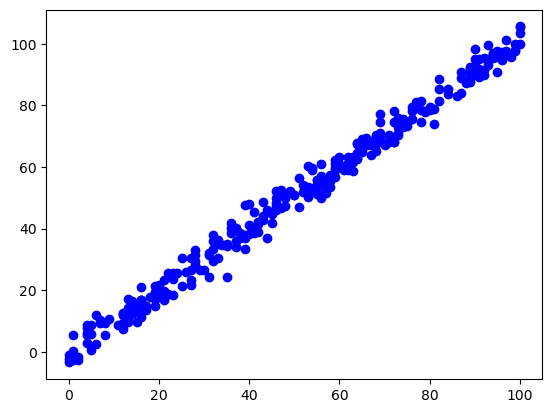

In [17]:
plt.scatter(x,y, c='b')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [23]:
X_train.shape, X_test.shape

((240,), (60,))

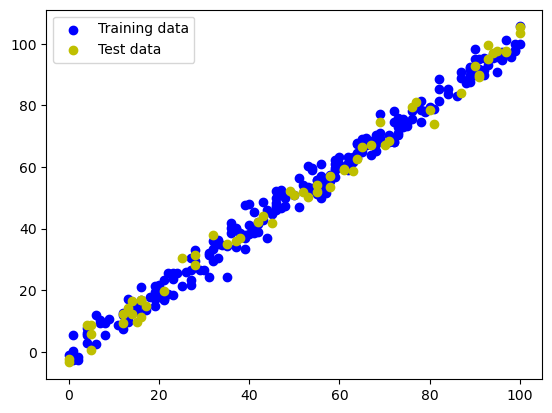

In [33]:
plt.scatter(X_train,y_train, c='b', label='Training data')
plt.scatter(X_test,y_test, c='y',  label='Test data')
plt.legend()
plt.show()

### Model building

In [86]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              metrics = ['mae'])

#train model
epoch_number = 10
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs = epoch_number)
    

Epoch 1/10


C:\Users\erang\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 32.9407 - mae: 32.9407
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.9619 - mae: 14.9619
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.0541 - mae: 9.0541
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5482 - mae: 5.5482
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.7539 - mae: 4.7539
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3581 - mae: 4.3581
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2317 - mae: 4.2317 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6439 - mae: 3.6439
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8259 - mae: 2.8259
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8677 - mae: 2.8677


In [88]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [90]:
y_predictions = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B23300B740> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [92]:
y_predictions[:5]

array([[92.81055  ],
       [78.34204  ],
       [96.944405 ],
       [ 4.9660373],
       [93.84401  ]], dtype=float32)

In [94]:
y_test.head()

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

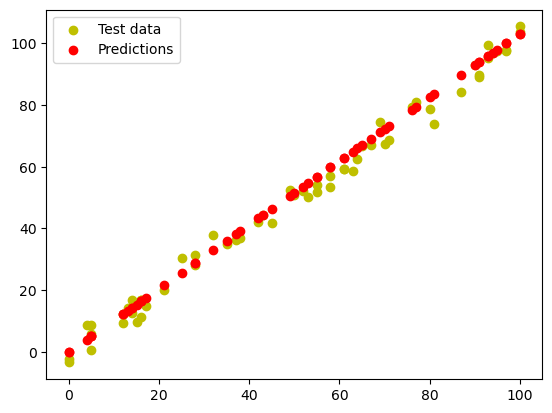

In [96]:
# plt.scatter(X_train,y_train, c='b', label='Training data')
plt.scatter(X_test,y_test, c='y',  label='Test data')
plt.scatter(X_test,y_predictions, c='r',  label='Predictions')
plt.legend()
plt.show()

In [98]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.7691 - mae: 2.7691 


[2.7690846920013428, 2.7690846920013428]

In [100]:
from tensorflow.keras.metrics import MeanAbsoluteError

mae = MeanAbsoluteError()
mae(y_test, tf.squeeze(y_predictions)).numpy()


2.7690847

In [102]:
y_predictions.shape


(60, 1)

In [104]:
y_test.shape

(60,)

In [106]:
from tensorflow.keras.metrics import MeanSquaredError

mse = MeanSquaredError()
mse(y_test, tf.squeeze(y_predictions)).numpy()

11.529027